Introducing Forall
==================

Now turn our attention to the derivation steps allowed in **Prove-It**.  We will start with *specialization* and *generalization* which both relate to `Forall`, $\forall$.  As we examine *specialization*, it will be important to recall *expression substitution* in `tutorial01_core_expr`.  This is the most challenging and interesting derivation step.  The remaining derivation steps in subsequent tutorials are much more straightforward.

While `Forall` is a core concept, the **Forall** operation class is defined outside of the core.  It is defined in `proveit.logic.boolean.quantifiers.Forall` but is aliased as `proveit.Forall` (since it is a core concept and the core needs to access this class).  The core does not need to know the details of this `Forall` class.  For example, this class has various methods that are convenient for manipulating expressions with $\forall$, but the core only needs to know how to check that a given **Expression** is a `Forall` **Expression**, how to access its various kinds of sub-**Expression**s, and how to create a new `Forall` **Expression**

In [1]:
# Let us create a basic Forall expression and examine it
from proveit import Forall
from proveit.common import x, P, Px, Q, Qx, S
basicForallExpr = Forall(x, Px, conditions=[Qx], domain=S)
basicForallExpr

The meaning of this **Expression** is that $P(x)$ is a true statement for all instances of $x$ for which $x \in S$ and $Q(x)$ is true.  Let us examine the internal structure of this expression.

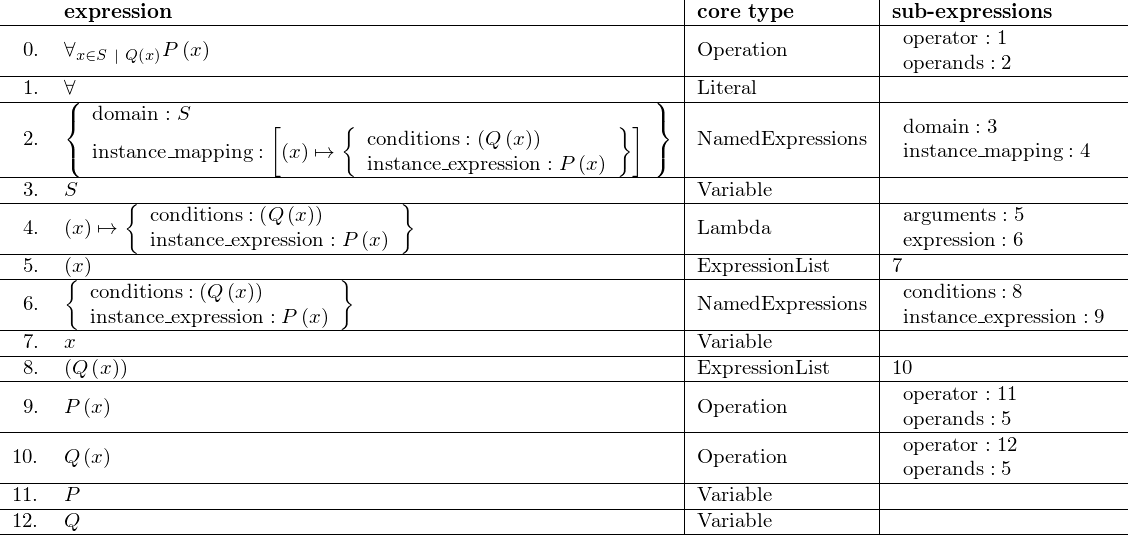

In [2]:
basicForallExpr.exprInfo()

`Forall` derives from `OperationOverInstances` (`proveit._generic_.genericOps.OperationOverInstances` aliased as `proveit.OperationOverInstance`) which defines the **NamedExpression** structures with `domain`, `instance_mapping`, `conditions`, and `instance_expression` sub-**Expression** roles.  This is a useful structure for all of the `OperationOverInstances` type of expressions ($\exists$, $\sum$, $\prod$, etc., as well as $\forall$).  In our example above, the `instance_mapping` defines the $\forall$ quantification for each instance and is a **Lambda** that maps $x$ (the "instance variable") to an `instance_expression`, $P(x)$, as well as $x$-dependent `conditions`, $(Q(x))$.  The  `domain` over which $x$ is being quantified is $S$.  Each of these `Forall` parts may be accessed as follows:

In [3]:
basicForallExpr.instanceVars

In [4]:
basicForallExpr.instanceExpr

In [5]:
basicForallExpr.conditions

In [6]:
basicForallExpr.domain

Specialization
======


### Basic Specialization

In [7]:
from proveit import Operation, InSet
from proveit.common import fy
assumptions = {basicForallExpr, Operation(Q, fy), InSet(fy, S)}
stmt = basicForallExpr.specialize({x:fy}, assumptions=assumptions)
stmt

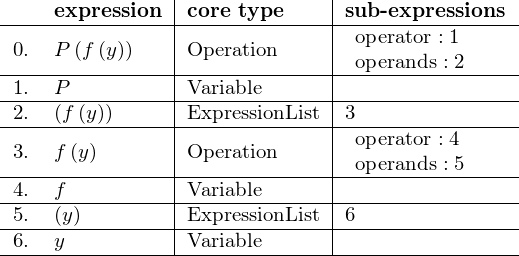

In [8]:
stmt.exprInfo()

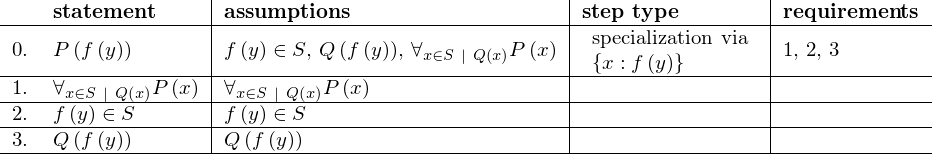

In [9]:
stmt.proof()

### Lambda scope restrictions

### Operation substitution

Generalization
========